# Introvert VS Extrovert Behavior Model using Logistic Regression and Random Forest


## Data Analysis


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Dataset
df = pd.read_csv("personality_dataset.csv")

# Drop null rows 
df = df.dropna()

# Encode categorical Yes/No -> 1/0
df["Stage_fear"] = df["Stage_fear"].map({"Yes": 1, "No": 0})
df["Drained_after_socializing"] = df["Drained_after_socializing"].map({"Yes": 1, "No": 0})

# Encode target Introvert=0, Extrovert=1
df["Personality"] = df["Personality"].map({"Introvert": 0, "Extrovert": 1})

# Features and Target
X = df.drop("Personality", axis=1)
y = df["Personality"]

# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (1733, 7)
Validation shape: (372, 7)
Test shape: (372, 7)


## Logistic Regression

=== Logistic Regression (Validation) ===
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       180
           1       0.94      0.93      0.93       192

    accuracy                           0.93       372
   macro avg       0.93      0.93      0.93       372
weighted avg       0.93      0.93      0.93       372

=== Logistic Regression (Test) ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       181
           1       0.95      0.94      0.94       191

    accuracy                           0.94       372
   macro avg       0.94      0.94      0.94       372
weighted avg       0.94      0.94      0.94       372



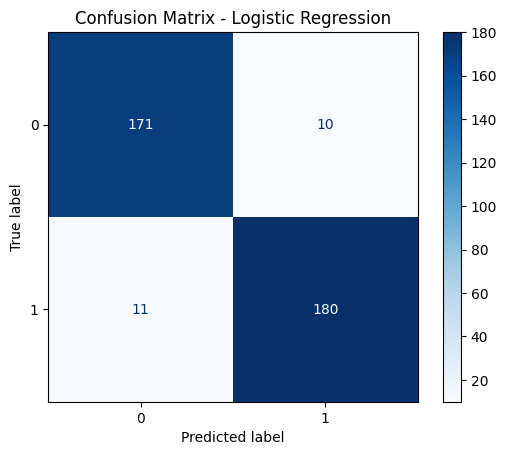

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
 
# Train Logistic Regression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

# Predictions
y_val_pred_lr = lr.predict(X_val_scaled)
y_test_pred_lr = lr.predict(X_test_scaled)
 
# Validation metrics 
print("=== Logistic Regression (Validation) ===")
print(classification_report(y_val, y_val_pred_lr))
 
# Test metrics 
print("=== Logistic Regression (Test) ===")
print(classification_report(y_test, y_test_pred_lr))
 
# Confusion Matrix (Test) 
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
ConfusionMatrixDisplay(cm_lr).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
